**Автоэнкодеры и изменение размерности исходного пространства**

Евгений Борисов <esborisov@sevsu.ru>

Михаил Сурцуков   Автоэнкодеры в Keras, Часть 2: Manifold learning и скрытые (latent) переменные.    
https://habr.com/ru/post/331500/

manifold learning,
обучение на многообразиях,
нелинейные методы снижения размерности, 
эмбединги

Доходчиво об обучении на основе многообразий с алгоритмами IsoMap, t-SNE и LLE   
https://medium.com/nuances-of-programming/доходчиво-об-обучении-на-основе-многообразий-с-алгоритмами-isomap-t-sne-и-lle-8fbb30851953

## генерируем данные

In [1]:
# from itertools import cycle
import numpy as np
from numpy import random as rng
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
# %matplotlib inline
# import seaborn as sns

In [2]:
def plot2d(data):
    plt.figure(figsize=(16,15))
    plt.xlim([-2.5, 2.5])
    for n,d in enumerate(data):
        if d['type'] == 'point':
            plt.scatter(d['data'][:,0],d['data'][:,1],s=1,marker='.',c=d['color'],label=d['label']) 
        elif d['type'] == 'sample':
            s = len(d['data'])
            m = list(Line2D.markers.keys())[1:-4][:s]
            for i,(x,y) in enumerate(d['data']):
                plt.scatter(x,y,s=90,marker=m[i],c=d['color'])
        else:
            plt.plot(d['data'][:,0],d['data'][:,1], lw=2, c=d['color'],label=d['label'])
    plt.grid()
    plt.legend()

In [3]:
# датасет
n_points = 1000
x = np.linspace(-2.2, 2.2,n_points)
y = np.sin(x)
d = np.vstack([x, y+rng.randn(n_points)*.2 ]).T 

# точки для отдельной визуализации
# отображаются одинаковым маркером но разным цветом для разных преобразований
n_samples = 7
samples_idx = range(0,n_points,n_points//n_samples)
s = d[ samples_idx ]

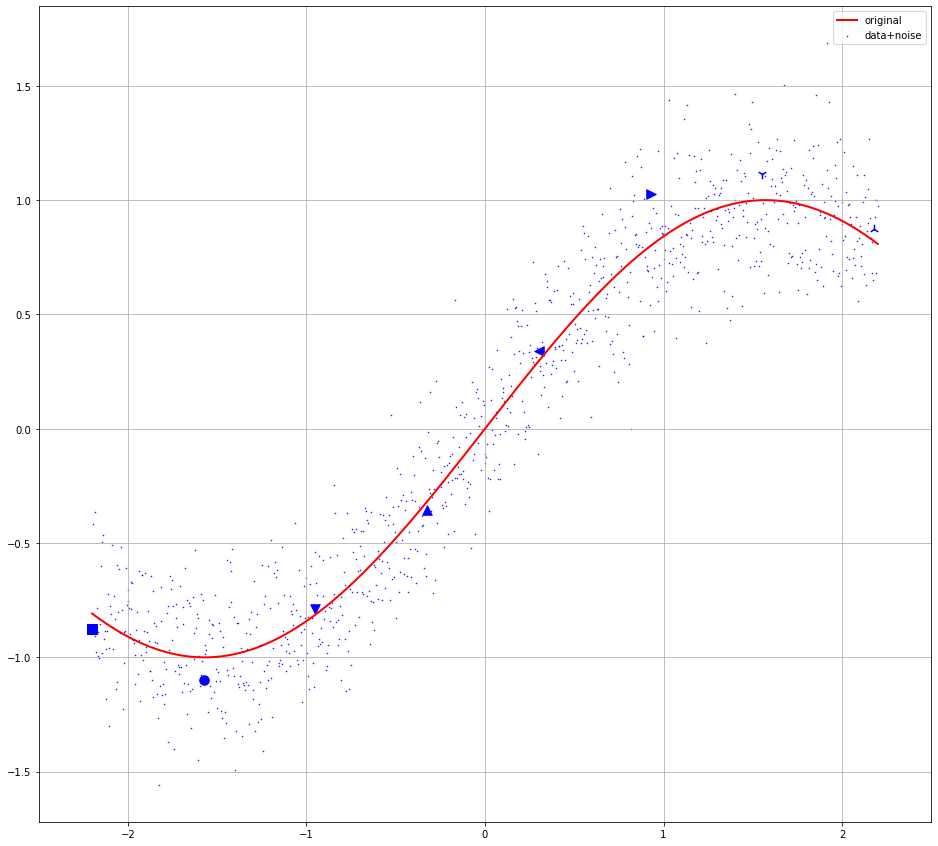

In [4]:
# визуализация
plot2d([
    {'type':'line','data':np.vstack([x,y]).T,'color':'r','label':'original',},
    {'type':'point','data':d,'color':'b', 'label':'data+noise',},
    {'type':'sample','data':s,'color':'b',},
    
])

## применяем PCA

In [5]:
# Применение PCA
from sklearn.decomposition import PCA

pca = PCA(1).fit(d)
d_pca = pca.inverse_transform(pca.transform(d))
s_pca = d_pca[ samples_idx ]

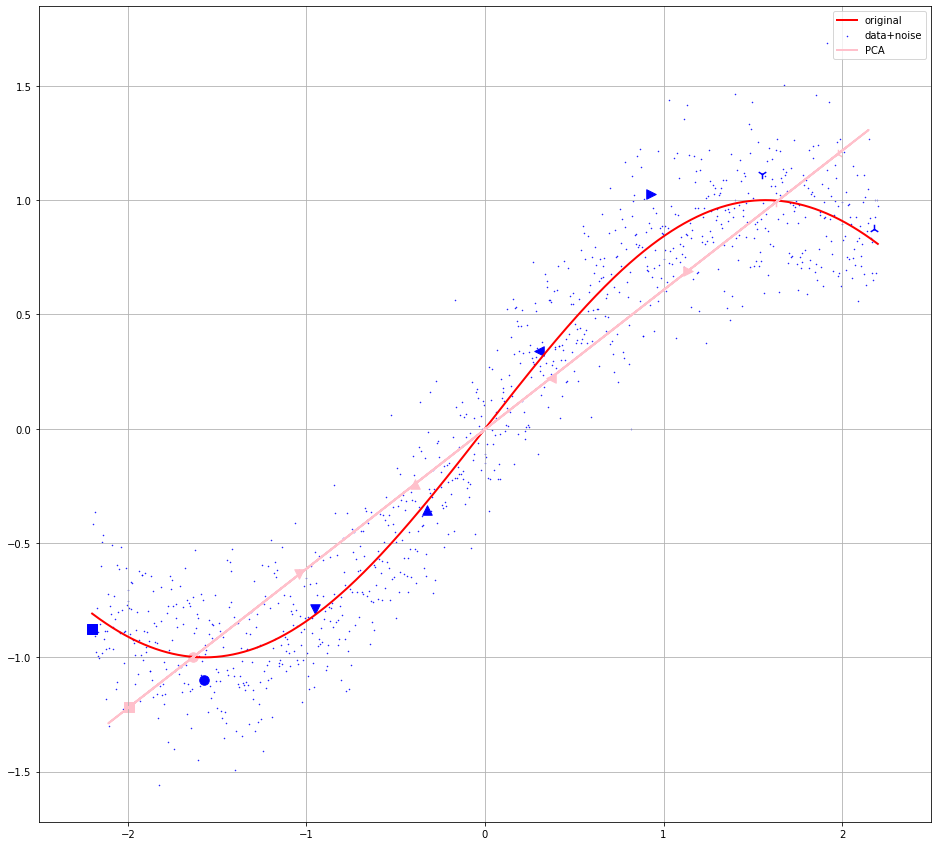

In [6]:
# визуализация
plot2d([
    {'type':'line','data':np.vstack([x,y]).T,'color':'r','label':'original',},
    {'type':'point','data':d,'color':'b', 'label':'data+noise',},
    {'type':'sample','data':s,'color':'b',},
    
    {'type':'line','data':d_pca,'color':'pink', 'label':'PCA',},
    {'type':'sample','data':s_pca,'color':'pink','label':'PCA samples',},
])

## применяем простой (линейный) автоэнкодер

In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# линейный автоэнкодер
model_ae = Sequential([
    Dense(1,activation='linear'),
    Dense(2,activation='linear'),
])
model_ae.compile( optimizer=Adam(learning_rate=.01), loss='mse')
model_ae.fit(d, d, epochs=15, batch_size=30,verbose=0)

# применение линейного автоэнкодера
d_ae = model_ae.predict(d)
s_ae = d_ae[ samples_idx ]

2022-06-07 17:34:07.188441: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-07 17:34:07.246609: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-07 17:34:07.246772: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-07 17:34:07.247367: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

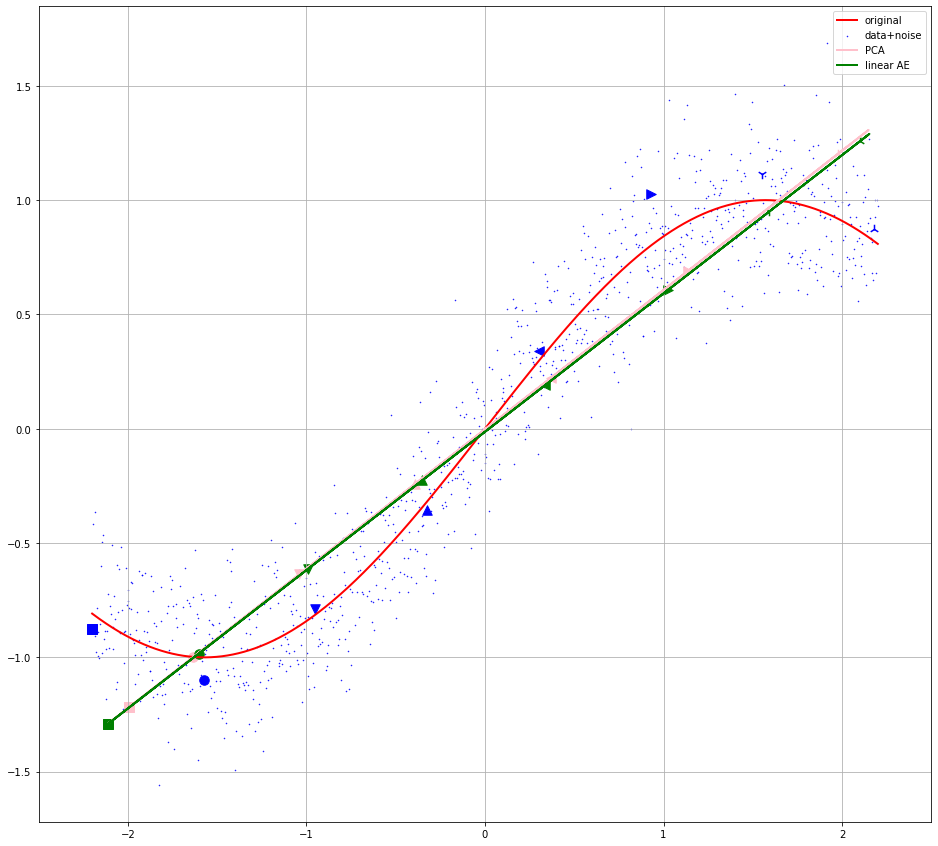

In [8]:
# визуализация
plot2d([
    {'type':'line','data':np.vstack([x,y]).T,'color':'r','label':'original',},
    {'type':'point','data':d,'color':'b', 'label':'data+noise',},
    {'type':'sample','data':s,'color':'b',},
    
    {'type':'line','data':d_pca,'color':'pink', 'label':'PCA',},
    {'type':'sample','data':s_pca,'color':'pink','label':'PCA samples',},
    
    {'type':'line','data':d_ae,'color':'green', 'label':'linear AE',},
    {'type':'sample','data':s_ae,'color':'green','label':'linear AE samples',},
    
])

## применяем deep автоэнкодер

In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# deep автоэнкодер
model_dae = Sequential([
    # Input(2)
    Dense(32,activation='elu'),
    Dense(16,activation='elu'),
    Dense(8,activation='elu'),
    
    Dense(1,activation='linear'),
    
    Dense(8,activation='elu'),
    Dense(16,activation='elu'),
    Dense(32,activation='elu'),
    
    Dense(2,activation='linear'),
])
model_dae.compile( optimizer=Adam(learning_rate=.01), loss='mse')
model_dae.fit(d, d, epochs=25, batch_size=30,verbose=0)

# применение deep автоэнкодера
d_dae = model_dae.predict(d)
s_dae = d_dae[ samples_idx ]

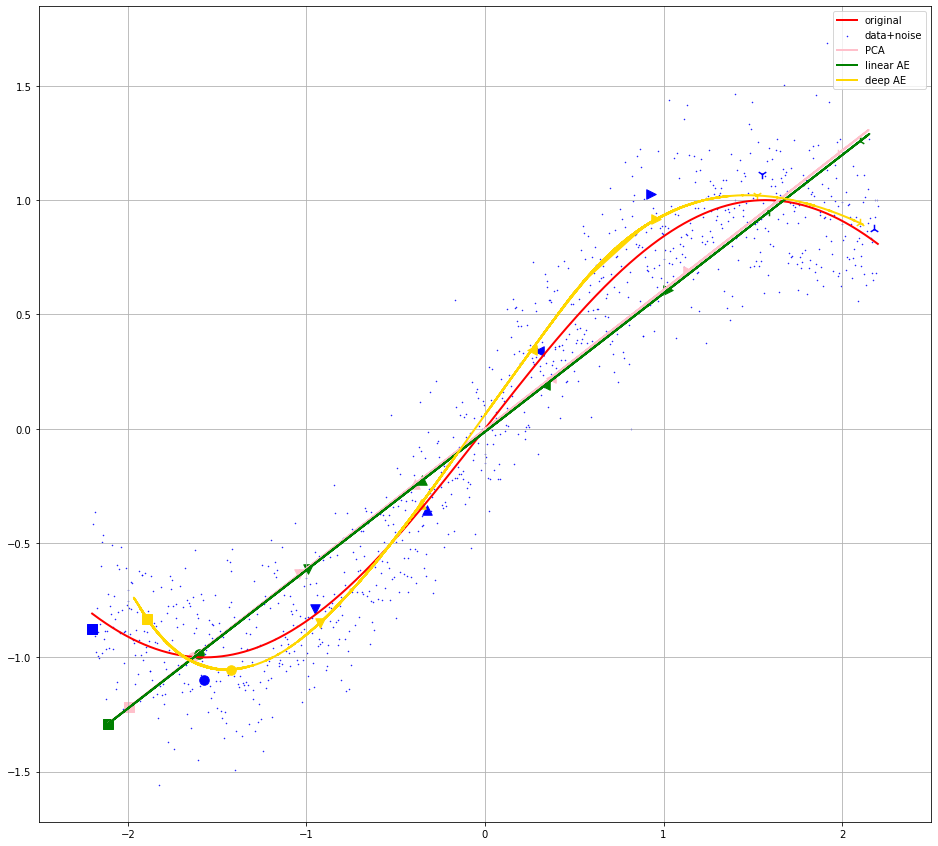

In [10]:
# визуализация
plot2d([
    {'type':'line','data':np.vstack([x,y]).T,'color':'r','label':'original',},
    {'type':'point','data':d,'color':'b', 'label':'data+noise',},
    {'type':'sample','data':s,'color':'b',},
    
    {'type':'line','data':d_pca,'color':'pink', 'label':'PCA',},
    {'type':'sample','data':s_pca,'color':'pink','label':'PCA samples',},
    
    {'type':'line','data':d_ae,'color':'green', 'label':'linear AE',},
    {'type':'sample','data':s_ae,'color':'green','label':'linear AE samples',},
    
    {'type':'line','data':d_dae,'color':'gold','label':'deep AE',},
    {'type':'sample','data':s_dae,'color':'gold','label':'deep AE samples',},
])

---

In [ ]:
# !pip3 install watermark
# Python package versions used
%load_ext watermark
%watermark --python
%watermark --iversions
#